In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import missingno as msno

In [4]:
import os

In [5]:
os.getcwd()

'E:\\PycharmProjects\\Practice Python\\KN'

In [6]:
df = pd.read_csv('pima_diabetes.csv')
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

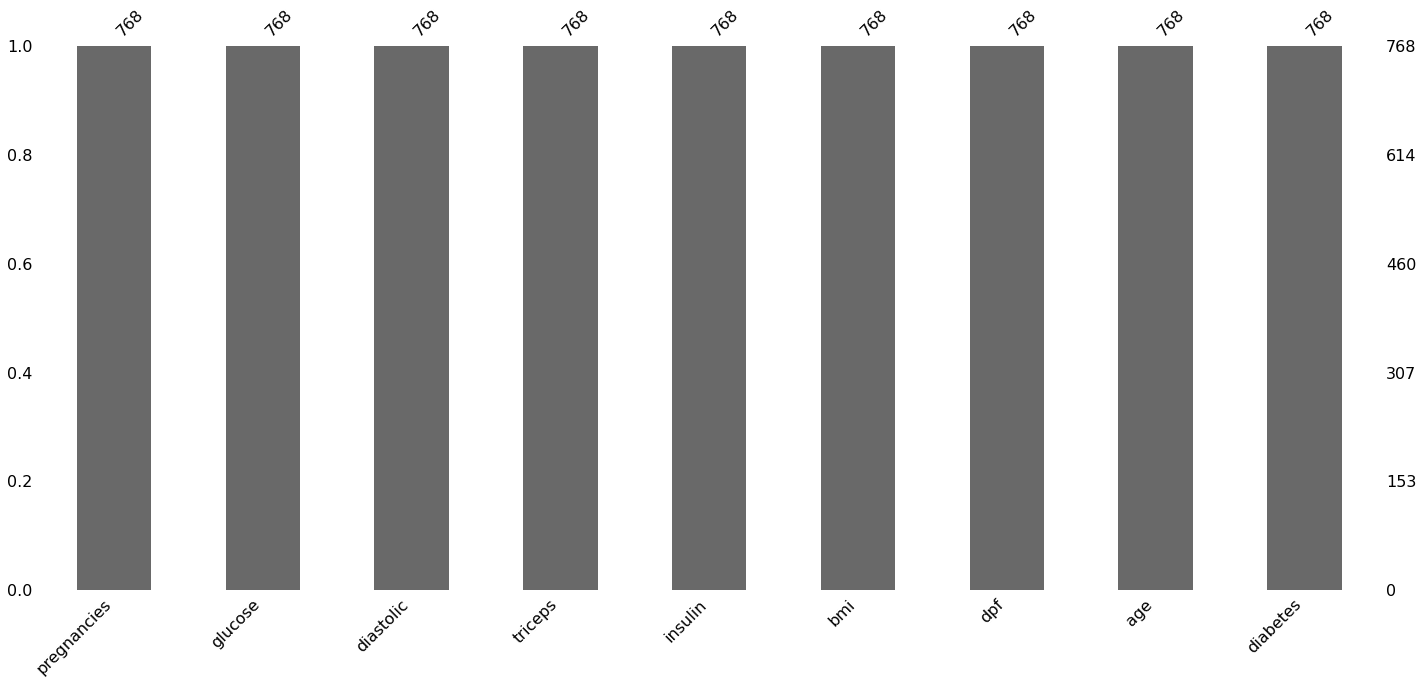

In [8]:
msno.bar(df)

From the above visualization for the null values, we can see that there are no null values present.

In [9]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


But from the above statistics, it is clear that there are certain number of missing values and are just represented by zero. For example from common knowledge, it can be known that the bmi, glucose level and diastolic blood pressure cannot be zero. Hence, replacing all the 0 by nan

In [10]:
df.insulin.replace(0,np.nan,inplace=True)
df.triceps.replace(0,np.nan,inplace=True)
df.bmi.replace(0,np.nan,inplace=True)

In [11]:
df.glucose.replace(0,np.nan,inplace=True)
df.diastolic.replace(0,np.nan,inplace=True)

In [12]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

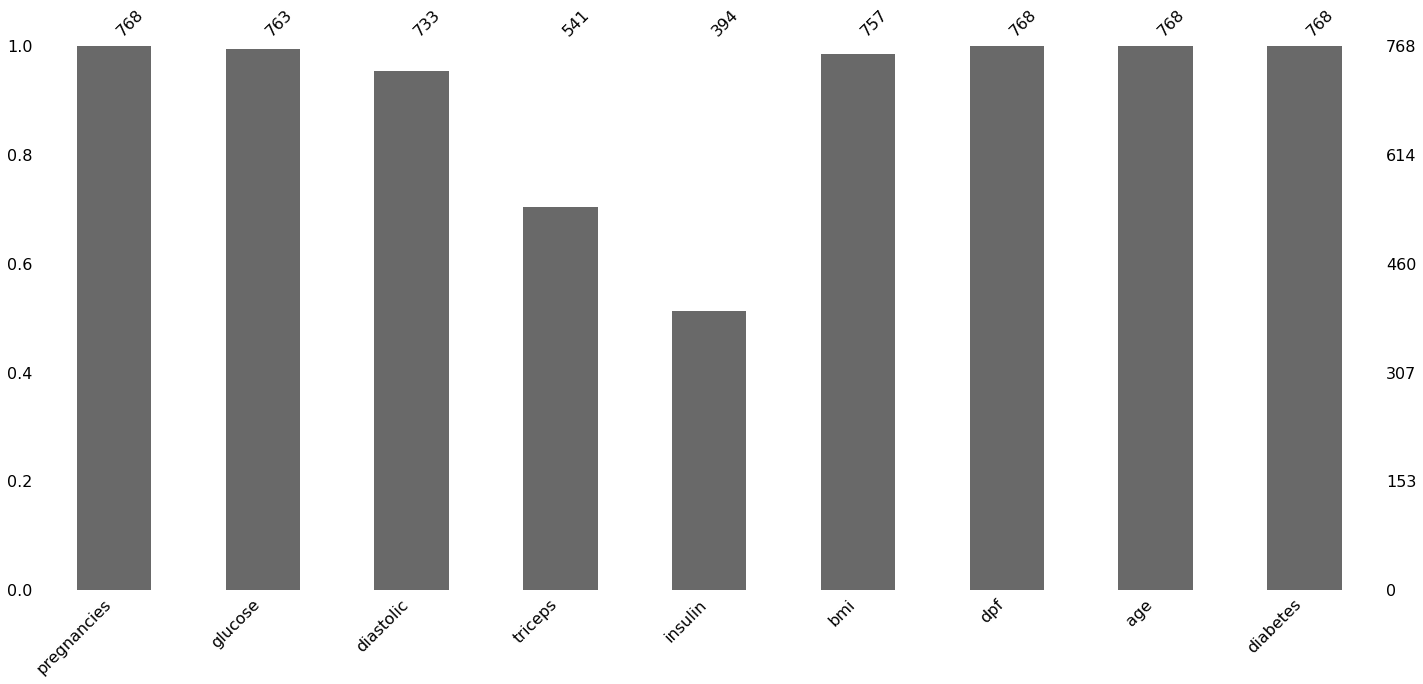

In [13]:
msno.bar(df)

<AxesSubplot:>

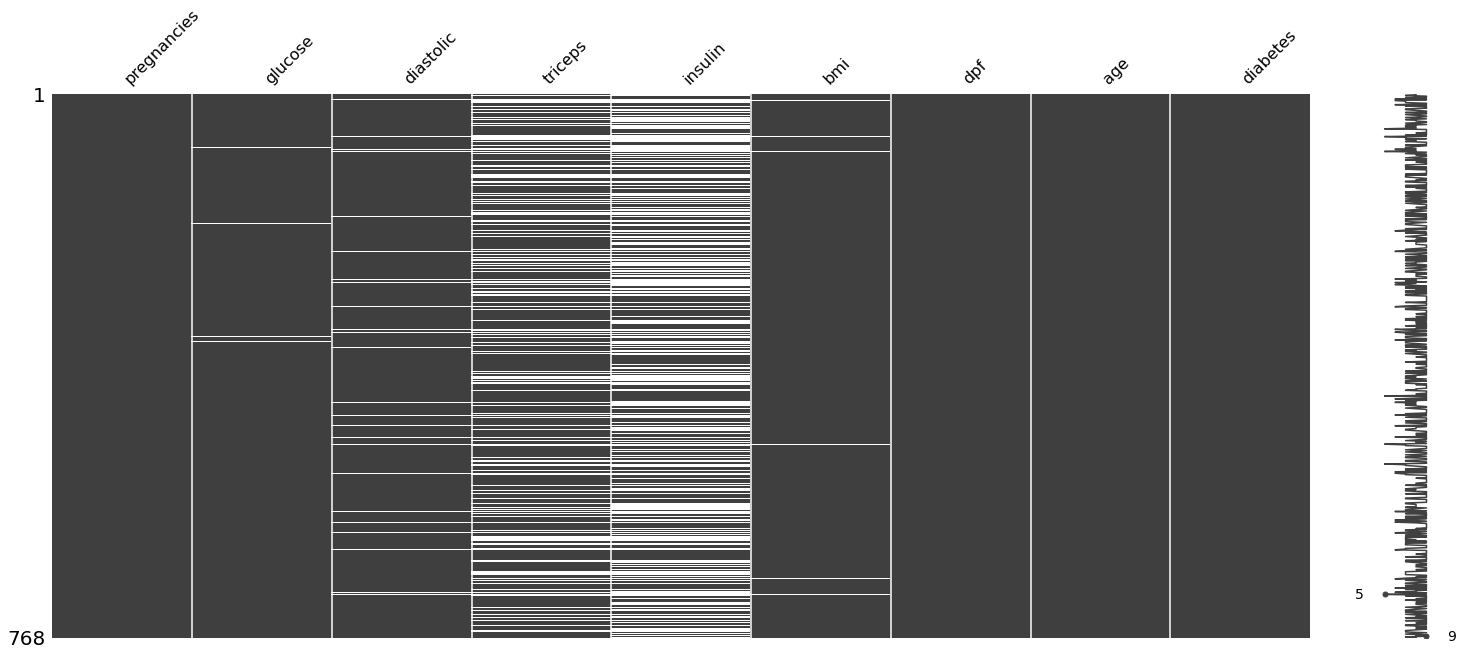

In [14]:
msno.matrix(df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

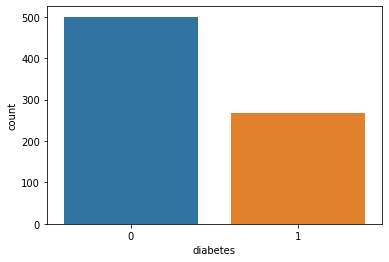

In [15]:
sns.countplot(x='diabetes',data=df)

# Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

<b> Note: Logistic regression, by default, is limited to two-class classification problems. Some extensions like one-vs-rest can allow logistic regression to be used for multi-class classification problems, although they require that the classification problem first be transformed into multiple binary classification problems. </b>

#### Asuumptions Made by Logistic Regression
- The dependent variable should be dichotomous in nature (e.g., presence vs absent).
- There should be no outliers in the data.
- There should be no high correlations among the independent/predictor variables. 

<AxesSubplot:>

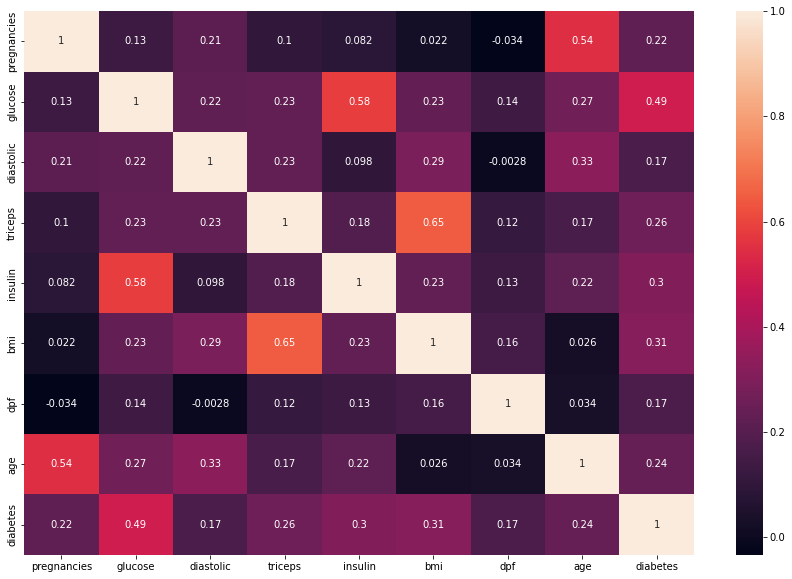

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [17]:
for parent_key,parent_values in df.corr().to_dict().items():
    for child_key,child_values in parent_values.items():
        if (child_values > 0.9):
            print(f'Parent Key: {parent_key}')
            print(f'Child Key: {child_key}')
            print(f'Value: {child_values}')
            print('-------')

Parent Key: pregnancies
Child Key: pregnancies
Value: 1.0
-------
Parent Key: glucose
Child Key: glucose
Value: 1.0
-------
Parent Key: diastolic
Child Key: diastolic
Value: 1.0
-------
Parent Key: triceps
Child Key: triceps
Value: 1.0
-------
Parent Key: insulin
Child Key: insulin
Value: 1.0
-------
Parent Key: bmi
Child Key: bmi
Value: 1.0
-------
Parent Key: dpf
Child Key: dpf
Value: 1.0
-------
Parent Key: age
Child Key: age
Value: 1.0
-------
Parent Key: diabetes
Child Key: diabetes
Value: 1.0
-------


Here, we can see that there are no highly correlated features.

### Imputing Missing Data with SimpleImputer and using Logistic Regression

In [18]:
X = df.drop(['diabetes'],axis=1)
y = df['diabetes']

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = LogisticRegression()
steps = [('simple_imputer',imp),
        ('logistic_regression', logreg)]

pipeline = Pipeline(steps)
#We use stratify parameter to preserve the proportion of the target
#variable as in the original dataset, in the train and test datasets as well.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=42,
                                                 stratify=y)

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(f'Score: {pipeline.score(X_test,y_test)}')

Score: 0.7359307359307359


C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [23]:
predictions_prob = pipeline.predict_proba(X_test)[:,1]
predictions_prob

array([0.24592408, 0.24789818, 0.77417864, 0.66303889, 0.49830535,
       0.07387432, 0.70852741, 0.10229944, 0.04099211, 0.39247699,
       0.05513017, 0.07700654, 0.06087805, 0.44601355, 0.84273131,
       0.95231904, 0.50226435, 0.36871144, 0.90037877, 0.23691604,
       0.32175948, 0.20111113, 0.05163659, 0.04672776, 0.82331395,
       0.35293307, 0.26046996, 0.33672084, 0.03110732, 0.11629283,
       0.71489492, 0.35477449, 0.1798184 , 0.04914554, 0.14461604,
       0.89705316, 0.12899884, 0.82850045, 0.24705604, 0.35126919,
       0.06200101, 0.94012354, 0.03386964, 0.07239925, 0.07145691,
       0.6528591 , 0.32144846, 0.72739015, 0.09063332, 0.05665439,
       0.32724288, 0.19111256, 0.8790568 , 0.0325502 , 0.76283139,
       0.17227598, 0.10086507, 0.70434526, 0.24600636, 0.30695182,
       0.02995582, 0.1586819 , 0.39903919, 0.41980503, 0.01155749,
       0.13397081, 0.11090844, 0.18446927, 0.19765827, 0.32107283,
       0.9524143 , 0.56653777, 0.00876105, 0.05532116, 0.08672

In [24]:
from sklearn.metrics import roc_curve,roc_auc_score

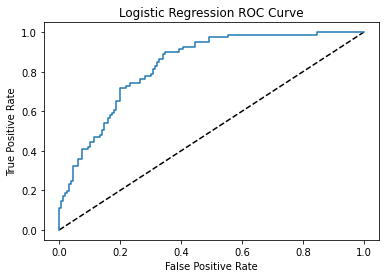

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistric Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [26]:
roc_auc_score(y_test, predictions_prob)

0.8331687242798353

### Using cross validation to see the performance of the model under different datasets

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cv_scores = cross_val_score(pipeline, X_train,y_train,cv=5,scoring='roc_auc')
cv_scores

C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

array([0.87218045, 0.85864662, 0.80772201, 0.76640927, 0.77567568])

In [29]:
cv_scores.mean()

0.8161268034952247

### Imputing Missing with KNNImputer and using Logistic Regression

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

imp = KNNImputer(missing_values=np.nan, n_neighbors=10)
logreg = LogisticRegression()
steps = [('knn_imputer',imp),
        ('logistic_regression', logreg)]

pipeline = Pipeline(steps)
#We use stratify parameter to preserve the proportion of the target
#variable as in the original dataset, in the train and test datasets as well.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=42,
                                                 stratify=y)

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
print(f'Score: {pipeline.score(X_test,y_test)}')

Score: 0.7402597402597403


C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [32]:
predictions_prob = pipeline.predict_proba(X_test)[:,1]
predictions_prob

array([0.24059833, 0.30489562, 0.76206639, 0.64623671, 0.46033361,
       0.07425192, 0.7087883 , 0.10907634, 0.03787859, 0.35852399,
       0.04882379, 0.08818203, 0.06216524, 0.46001601, 0.83520799,
       0.94932697, 0.4406186 , 0.37045438, 0.83597399, 0.23733689,
       0.26892284, 0.21152954, 0.06112234, 0.04675664, 0.80572053,
       0.32466624, 0.26158263, 0.32078606, 0.03464239, 0.12384254,
       0.66071353, 0.3739588 , 0.19111189, 0.05553337, 0.11360486,
       0.91475576, 0.11669729, 0.82109609, 0.20286488, 0.41081945,
       0.06023775, 0.93969881, 0.04022297, 0.07050343, 0.06561477,
       0.6222191 , 0.33461406, 0.68706847, 0.10044342, 0.05914868,
       0.32081636, 0.17370067, 0.86597849, 0.03391413, 0.76065095,
       0.17898492, 0.12912444, 0.84337349, 0.2765849 , 0.29122713,
       0.02916528, 0.12699255, 0.39152127, 0.46224046, 0.01397158,
       0.14705898, 0.13012841, 0.18214182, 0.24574889, 0.29370477,
       0.94554944, 0.53019435, 0.01132807, 0.03713286, 0.08085

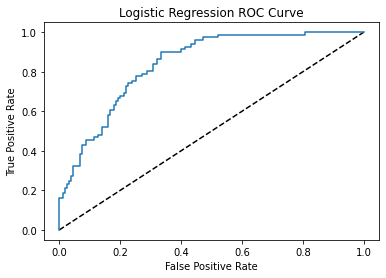

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistric Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [34]:
roc_auc_score(y_test, predictions_prob)

0.8389300411522633

In [35]:
cv_scores = cross_val_score(pipeline, X_train,y_train,cv=5,scoring='roc_auc')
cv_scores

C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

array([0.86691729, 0.84887218, 0.80579151, 0.74942085, 0.7969112 ])

In [36]:
cv_scores.mean()

0.8135826051615526

In [38]:
pipeline.get_params()

{'memory': None,
 'steps': [('knn_imputer', KNNImputer(n_neighbors=10)),
  ('logistic_regression', LogisticRegression())],
 'verbose': False,
 'knn_imputer': KNNImputer(n_neighbors=10),
 'logistic_regression': LogisticRegression(),
 'knn_imputer__add_indicator': False,
 'knn_imputer__copy': True,
 'knn_imputer__metric': 'nan_euclidean',
 'knn_imputer__missing_values': nan,
 'knn_imputer__n_neighbors': 10,
 'knn_imputer__weights': 'uniform',
 'logistic_regression__C': 1.0,
 'logistic_regression__class_weight': None,
 'logistic_regression__dual': False,
 'logistic_regression__fit_intercept': True,
 'logistic_regression__intercept_scaling': 1,
 'logistic_regression__l1_ratio': None,
 'logistic_regression__max_iter': 100,
 'logistic_regression__multi_class': 'auto',
 'logistic_regression__n_jobs': None,
 'logistic_regression__penalty': 'l2',
 'logistic_regression__random_state': None,
 'logistic_regression__solver': 'lbfgs',
 'logistic_regression__tol': 0.0001,
 'logistic_regression__verbo

### Using GridSearch to search for the best parameters for the Logistic Regression

In [39]:
from sklearn.model_selection import GridSearchCV

In [48]:
steps = [
    ('imp',KNNImputer()),
    ('logreg',LogisticRegression())
]
pipeline = Pipeline(steps)

parameters = {
    'imp__n_neighbors': np.arange(1,26),
    'imp__weights': ['uniform','distance'],
    'logreg__solver': ['newton-cg','liblinear'],
}

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101,stratify=y)
cv = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imp', KNNImputer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'imp__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25]),
                         'imp__weights': ['uniform', 'distance'],
                         'logreg__solver': ['newton-cg', 'liblinear']})

In [49]:
cv.best_params_

{'imp__n_neighbors': 4,
 'imp__weights': 'uniform',
 'logreg__solver': 'newton-cg'}

In [50]:
cv.best_score_

0.7877639321564555

In [51]:
predictions = cv.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [53]:
predictions_prob = cv.predict_proba(X_test)[:,1]
predictions_prob

array([0.15080538, 0.1990532 , 0.34699223, 0.56829649, 0.09934918,
       0.93431081, 0.34987221, 0.08661818, 0.88924245, 0.04329539,
       0.48238869, 0.19485765, 0.05299102, 0.03408177, 0.20554026,
       0.55823384, 0.03891575, 0.17178203, 0.14124469, 0.11562236,
       0.69468597, 0.50932834, 0.26290432, 0.38541666, 0.08911319,
       0.83988003, 0.44456109, 0.05705031, 0.32137689, 0.05710554,
       0.37602223, 0.06756326, 0.85206561, 0.920509  , 0.67904753,
       0.9938702 , 0.17165237, 0.04145009, 0.30808097, 0.7382601 ,
       0.35341413, 0.3509568 , 0.12342155, 0.21036409, 0.06173163,
       0.20867642, 0.30648147, 0.07719411, 0.13894083, 0.07549874,
       0.53636891, 0.70261151, 0.37810592, 0.37006045, 0.07504848,
       0.43056753, 0.16386668, 0.01173169, 0.57810896, 0.12387449,
       0.07666861, 0.43053883, 0.20862684, 0.2145549 , 0.55758955,
       0.18511916, 0.74036843, 0.21272293, 0.07620704, 0.25923013,
       0.42933247, 0.35204969, 0.21451671, 0.76760284, 0.20092

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



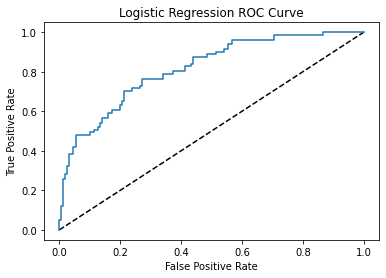

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistric Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [61]:
print(f'ROC-AUC score: {roc_auc_score(y_test, predictions_prob)}')

ROC-AUC score: 0.8154732510288065
